In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from itertools import product
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.graphics.mosaicplot import mosaic

In [3]:
df = pd.read_csv("Superstore.csv")

In [4]:
df

,Category,City,Container,Customer ID,Customer Name,Customer Segment,Department,Discount,Item ID,Item,...,Product Base Margin,Profit,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price
0,Paper,Lombard,Small Box,3035,Mark Bailey,Home Office,Office Supplies,0.01,10074,Hammermill CopyPlus Copy Paper (20Lb. and 84 B...,...,0.36,-76,Central,11/18/1951,53,11/9/2018,Regular Air,5,Illinois,5
1,Paper,Lombard,Wrap Bag,3035,Mark Bailey,Home Office,Office Supplies,0.04,10079,Telephone Message Books with Fax/Mobile Sectio...,...,0.39,52,Central,11/19/1951,76,11/12/2016,Regular Air,1,Illinois,6
2,Pens & Art Supplies,Southbury,Wrap Bag,3385,Daniel Richmond,Corporate,Office Supplies,0.04,11012,"Premium Writing Pencils, Soft, #2 by Central A...",...,0.57,-22,East,3/1/1961,16,11/23/2017,Express Air,2,Connecticut,3
3,Binders and Binder Accessories,Coachella,Small Box,3133,Kristine Singleton,Corporate,Office Supplies,0.10,10646,Fellowes Black Plastic Comb Bindings,...,0.39,-350,West,6/27/1961,65,1/25/2018,Regular Air,8,California,6
4,Rubber Bands,Coachella,Wrap Bag,3133,Kristine Singleton,Corporate,Office Supplies,0.03,10138,Assorted Color Push Pins,...,0.52,4,West,6/28/1961,19,1/25/2018,Regular Air,1,California,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9421,"Scissors, Rulers and Trimmers",Dublin,Wrap Bag,2733,Marian Godwin,Small Business,Office Supplies,0.08,11255,Serrated Blade or Curved Handle Hand Letter Op...,...,0.84,-48,West,11/6/1969,38,12/16/2017,Regular Air,2,California,3
9422,Pens & Art Supplies,Cottage Grove,Wrap Bag,2291,Maxine Joyner,Corporate,Office Supplies,0.06,11154,"Dixon My First Ticonderoga Pencil, #2",...,0.56,-2,Central,3/5/1959,53,7/7/2018,Regular Air,2,Minnesota,6
9423,Appliances,Sanford,Small Box,436,Lauren Lanier,Small Business,Office Supplies,0.05,11144,Tripp Lite Isotel 8 Ultra 8 Outlet Metal Surge,...,0.59,569,East,12/2/1954,825,11/28/2017,Regular Air,4,Maine,71
9424,Paper,Paterson,Small Box,931,Norma Hull,Small Business,Office Supplies,0.07,10859,Xerox 1893,...,0.36,22,East,8/1/1962,163,7/21/2016,Regular Air,17,New Jersey,41


In [5]:
df.head(10)

,Category,City,Container,Customer ID,Customer Name,Customer Segment,Department,Discount,Item ID,Item,...,Product Base Margin,Profit,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price
0,Paper,Lombard,Small Box,3035,Mark Bailey,Home Office,Office Supplies,0.01,10074,Hammermill CopyPlus Copy Paper (20Lb. and 84 B...,...,0.36,-76,Central,11/18/1951,53,11/9/2018,Regular Air,5,Illinois,5
1,Paper,Lombard,Wrap Bag,3035,Mark Bailey,Home Office,Office Supplies,0.04,10079,Telephone Message Books with Fax/Mobile Sectio...,...,0.39,52,Central,11/19/1951,76,11/12/2016,Regular Air,1,Illinois,6
2,Pens & Art Supplies,Southbury,Wrap Bag,3385,Daniel Richmond,Corporate,Office Supplies,0.04,11012,"Premium Writing Pencils, Soft, #2 by Central A...",...,0.57,-22,East,3/1/1961,16,11/23/2017,Express Air,2,Connecticut,3
3,Binders and Binder Accessories,Coachella,Small Box,3133,Kristine Singleton,Corporate,Office Supplies,0.10,10646,Fellowes Black Plastic Comb Bindings,...,0.39,-350,West,6/27/1961,65,1/25/2018,Regular Air,8,California,6
4,Rubber Bands,Coachella,Wrap Bag,3133,Kristine Singleton,Corporate,Office Supplies,0.03,10138,Assorted Color Push Pins,...,0.52,4,West,6/28/1961,19,1/25/2018,Regular Air,1,California,2
5,Storage & Organization,Hot Springs,Small Box,1697,Holly Osborne,Home Office,Office Supplies,0.00,10896,"Fellowes Personal Hanging Folder Files, Navy",...,0.57,-254,South,4/13/1968,130,9/4/2017,Regular Air,6,Arkansas,13
6,Tables,Woodmere,Jumbo Box,1603,Dwight Pentecost,Small Business,Furniture,0.05,10550,"Bevis Round Conference Table Top, X-Base",...,0.76,-537,East,6/6/1964,187,1/13/2018,Delivery Truck,29,New York,179
7,Office Furnishings,Laurel,Medium Box,2924,Courtney Nelson,Consumer,Furniture,0.02,10535,"Rubbermaid ClusterMat Chairmats, Mat Size- 66""...",...,0.69,-106,East,3/23/1950,227,10/20/2017,Regular Air,14,Maryland,111
8,Paper,Laurel,Wrap Bag,2924,Courtney Nelson,Consumer,Office Supplies,0.01,11122,"TOPS Money Receipt Book, Consecutively Numbere...",...,0.40,45,East,3/24/1950,69,10/18/2018,Regular Air,3,Maryland,8
9,Rubber Bands,Woodmere,Wrap Bag,1603,Dwight Pentecost,Small Business,Office Supplies,0.09,10573,Stockwell Push Pins,...,0.52,2,East,6/5/1964,19,1/13/2018,Regular Air,1,New York,2


In [6]:
df.tail(10)

,Category,City,Container,Customer ID,Customer Name,Customer Segment,Department,Discount,Item ID,Item,...,Product Base Margin,Profit,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price
9416,Binders and Binder Accessories,Durham,Small Box,1033,Sean Sparks,Corporate,Office Supplies,0.00,10996,GBC Recycled Regency Composition Covers,...,0.39,40,South,8/25/1965,252,8/25/2016,Regular Air,10,North Carolina,60
9417,Computer Peripherals,Minnetonka,Small Pack,2984,Kelly Burnette,Corporate,Technology,0.10,11059,Imation Printable White 80 Minute CD-R Spindle...,...,0.44,-59,Central,6/25/1958,80,10/13/2017,Regular Air,2,Minnesota,41
9418,Envelopes,Santa Rosa,Small Box,1696,Bonnie G Keith,Home Office,Office Supplies,0.10,10829,Recycled Interoffice Envelopes with String and...,...,0.35,-148,West,10/21/1962,355,10/26/2017,Regular Air,7,California,24
9419,Paper,Atlanta,Small Box,471,Ross Simpson,Consumer,Office Supplies,0.00,10753,Xerox 196,...,0.36,-220,South,11/30/1906,335,10/31/2018,Regular Air,8,Georgia,6
9420,Tables,Oxford,Jumbo Box,211,Anna Wood,Corporate,Furniture,0.00,10883,Hon iLevel? Computer Training Table,...,0.65,-1807,East,4/1/1966,497,9/20/2018,Delivery Truck,46,Massachusetts,32
9421,"Scissors, Rulers and Trimmers",Dublin,Wrap Bag,2733,Marian Godwin,Small Business,Office Supplies,0.08,11255,Serrated Blade or Curved Handle Hand Letter Op...,...,0.84,-48,West,11/6/1969,38,12/16/2017,Regular Air,2,California,3
9422,Pens & Art Supplies,Cottage Grove,Wrap Bag,2291,Maxine Joyner,Corporate,Office Supplies,0.06,11154,"Dixon My First Ticonderoga Pencil, #2",...,0.56,-2,Central,3/5/1959,53,7/7/2018,Regular Air,2,Minnesota,6
9423,Appliances,Sanford,Small Box,436,Lauren Lanier,Small Business,Office Supplies,0.05,11144,Tripp Lite Isotel 8 Ultra 8 Outlet Metal Surge,...,0.59,569,East,12/2/1954,825,11/28/2017,Regular Air,4,Maine,71
9424,Paper,Paterson,Small Box,931,Norma Hull,Small Business,Office Supplies,0.07,10859,Xerox 1893,...,0.36,22,East,8/1/1962,163,7/21/2016,Regular Air,17,New Jersey,41
9425,Computer Peripherals,Taylor,Small Box,2155,Raymond Clark,Home Office,Technology,0.06,10229,Keytronic Designer 104- Key Black Keyboard,...,0.77,-315,Central,9/21/1953,242,9/5/2016,Regular Air,20,Michigan,40


In [8]:
df.mode()

,Category,City,Container,Customer ID,Customer Name,Customer Segment,Department,Discount,Item ID,Item,...,Product Base Margin,Profit,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price
0,Paper,Oxford,Small Box,1193.0,Louis Parrish,Corporate,Office Supplies,0.01,11166.0,"Global High-Back Leather Tilter, Burgundy",...,0.37,1.0,East,1/1/1900,17.0,2/15/2018,Regular Air,1.0,Texas,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1/1/1918,19.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1/1/1950,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1/1/1951,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1/1/1952,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9/9/1967,NaN,NaN,NaN,NaN,NaN,NaN
9422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9/9/1968,NaN,NaN,NaN,NaN,NaN,NaN
9423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9/9/1969,NaN,NaN,NaN,NaN,NaN,NaN
9424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9/9/1970,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Category             9426 non-null   object 
 1   City                 9426 non-null   object 
 2   Container            9426 non-null   object 
 3   Customer ID          9426 non-null   int64  
 4   Customer Name        9426 non-null   object 
 5   Customer Segment     9426 non-null   object 
 6   Department           9426 non-null   object 
 7   Discount             9426 non-null   float64
 8   Item ID              9426 non-null   int64  
 9   Item                 9426 non-null   object 
 10  Number of Records    9426 non-null   int64  
 11  Order Date           9426 non-null   object 
 12  Order ID             9426 non-null   int64  
 13  Order Priority       9426 non-null   object 
 14  Order Quantity       9426 non-null   int64  
 15  Postal Code          9426 non-null   i

In [11]:
df.describe()

,Customer ID,Discount,Item ID,Number of Records,Order ID,Order Quantity,Postal Code,Product Base Margin,Profit,Sales,Shipping Cost,Unit Price
count,9426.000000,9426.000000,9426.000000,9426.0,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000
mean,1738.422236,0.049628,10734.269998,1.0,82318.489073,13.798430,47136.702313,0.508277,139.233503,949.716423,12.813601,88.286123
std,979.167197,0.031798,340.712162,0.0,19149.448857,15.107688,32079.511571,0.141901,998.486307,2598.020092,17.171179,281.537536
min,2.000000,0.000000,10001.000000,1.0,6.000000,1.000000,1001.000000,0.000000,-16477.000000,1.000000,0.000000,1.000000
25%,898.000000,0.020000,10470.000000,1.0,86737.250000,5.000000,18040.000000,0.380000,-74.000000,61.000000,3.000000,6.000000
50%,1750.000000,0.050000,10767.500000,1.0,88344.500000,10.000000,46322.000000,0.520000,3.000000,203.000000,6.000000,21.000000
75%,2578.750000,0.080000,11027.000000,1.0,89987.750000,17.000000,76037.000000,0.590000,140.000000,776.000000,14.000000,86.000000
max,3403.000000,0.250000,11263.000000,1.0,91591.000000,170.000000,99362.000000,0.850000,16332.000000,100119.000000,165.000000,6783.000000


In [13]:
df.isnull()

,Category,City,Container,Customer ID,Customer Name,Customer Segment,Department,Discount,Item ID,Item,...,Product Base Margin,Profit,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9421,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9422,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9423,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9424,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

Category               0
City                   0
Container              0
Customer ID            0
Customer Name          0
Customer Segment       0
Department             0
Discount               0
Item ID                0
Item                   0
Number of Records      0
Order Date             0
Order ID               0
Order Priority         0
Order Quantity         0
Postal Code            0
Product Base Margin    0
Profit                 0
Region                 0
Row ID                 0
Sales                  0
Ship Date              0
Ship Mode              0
Shipping Cost          0
State                  0
Unit Price             0
dtype: int64

<AxesSubplot:xlabel='Profit', ylabel='Sales'>

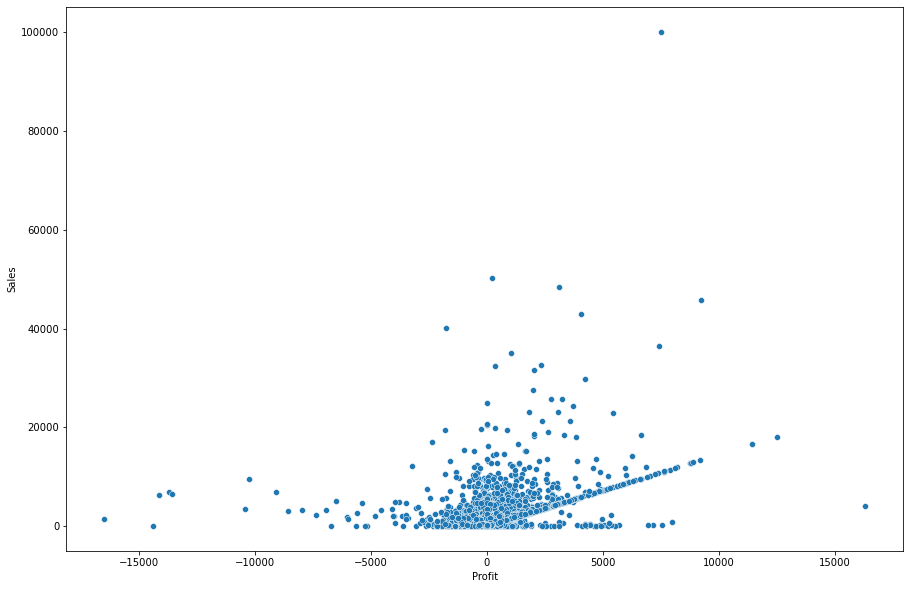

In [19]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Profit', y='Sales', data=df)

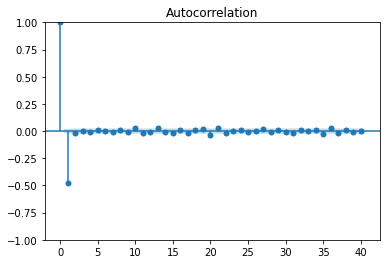

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df.Profit.diff().dropna());

C:\Users\Checkout\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Checkout\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Checkout\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histogr

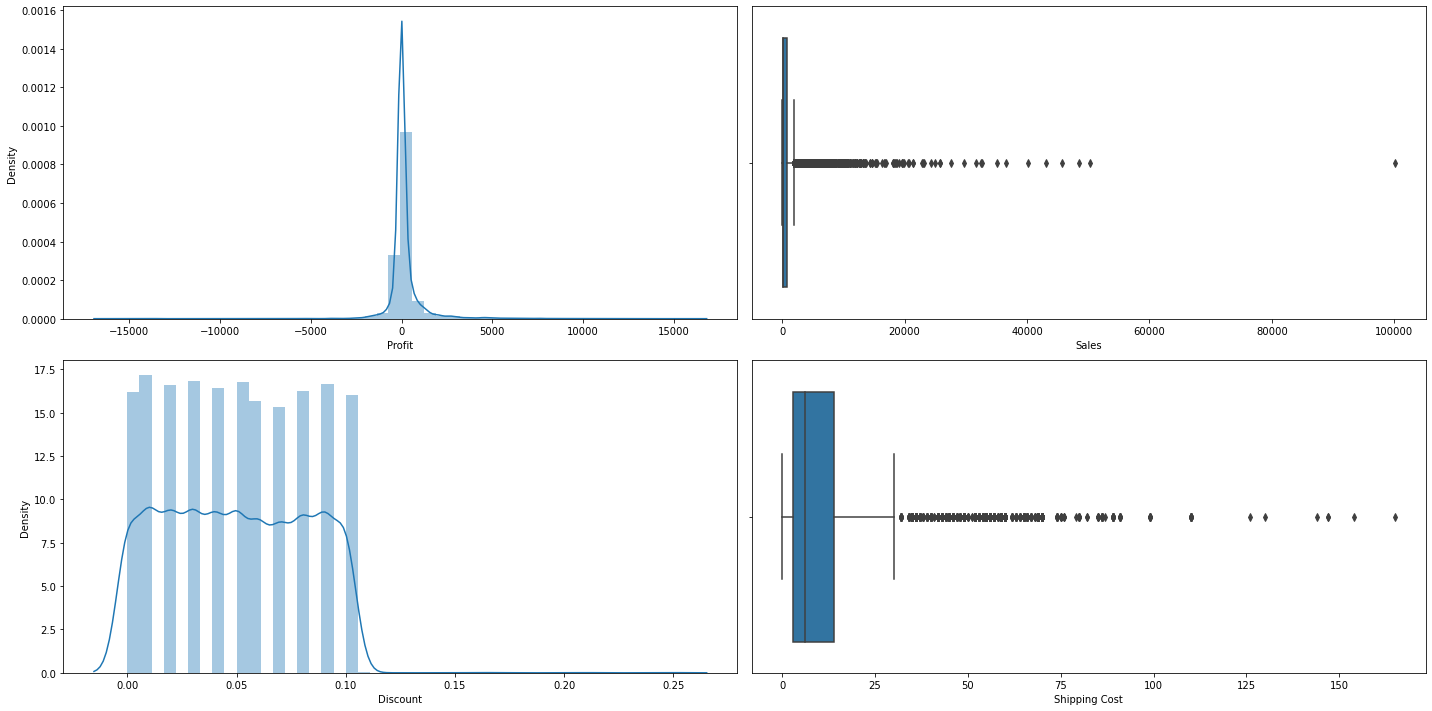

In [37]:
plt.figure(figsize = (20, 10))

plt.subplot(2, 2, 1)
sns.distplot(df['Profit'])

plt.subplot(2,2,2)
sns.boxplot(df['Sales'])

plt.subplot(2, 2, 3)
sns.distplot(df['Discount'])

plt.subplot(2, 2, 4)
sns.boxplot(df['Shipping Cost'])

plt.tight_layout()
plt.show()

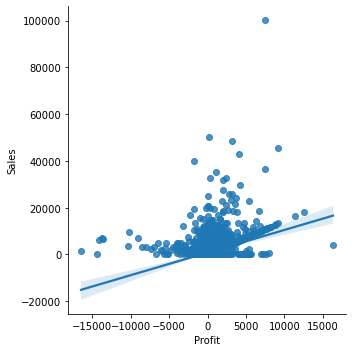

In [40]:
g= sns.lmplot(x="Profit", y="Sales",data=df)